# 01 - Data Preparation

This notebook handles data collection, cleaning, and preprocessing for the Sri Lanka itinerary optimization project.

## Goal
Prepare the raw POI dataset by generating the three critical features required for the TTDP optimization:
1. **Interest Score (p_i)**: Numerical attractiveness value for each POI
2. **Visit Duration (v_i)**: Time required to visit each POI
3. **Travel Time Matrix (t_ij)**: Time to travel between any two POIs

## Expected Outcome
A clean, enriched dataset with all necessary features saved for use in optimization algorithms.

### Step 1: Import Libraries and Load Data

We import necessary libraries and load the raw POI data from CSV.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add src to path
sys.path.append('../src')
from utils import (load_pois, calculate_distance, assign_interest_score, 
                   assign_visit_duration, calculate_travel_time)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
# Load POI data
pois = load_pois('../data/raw/attractions.csv')
print(f"Loaded {len(pois)} Points of Interest")
print(f"\nDataset shape: {pois.shape}")
print(f"\nColumn names: {list(pois.columns)}")

Loaded 1224 Points of Interest

Dataset shape: (1224, 5)

Column names: ['name', 'rating', 'category', 'latitude', 'longitude']


### Step 2: Data Exploration and Validation

Examine the structure, check for missing values, and understand the data distribution.

In [3]:
# Display first few rows
print("First 10 rows of the dataset:")
pois.head(10)

First 10 rows of the dataset:


,name,rating,category,latitude,longitude
0,Gomarankadawala Hot Springs,3.0,UniqueExperiences,8.707572,80.991975
1,Kirigalpottha Mountain,5.0,HikesnViews,6.800819,80.765820
2,The Place-Galle,4.0,Accommodation,6.004148,80.259122
3,Gal Ekka Ella,2.0,Waterfalls,6.831384,81.015669
4,Backpack Beach Hostel & Reggae Bar,4.0,Accommodation,6.068105,80.167831
5,Balana Fort,2.0,Cultural,7.269026,80.497969
6,Dambegoda Bodhisattva statue,3.0,Cultural,6.726496,81.357536
7,Maligatenne ( Nuwaragalkande) Ruins,4.0,Cultural,7.843425,80.796585
8,Vessagiriya Ruins - Anuradhapura,4.0,Cultural,8.328279,80.390034
9,Welgam Rajamaha Viharaya,3.0,Cultural,8.646721,81.171575


In [4]:
# Check data types and missing values
print("Dataset Info:")
print(pois.info())
print("\nMissing values:")
print(pois.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1224 non-null   object 
 1   rating     1221 non-null   float64
 2   category   1224 non-null   object 
 3   latitude   1224 non-null   float64
 4   longitude  1224 non-null   float64
dtypes: float64(3), object(2)
memory usage: 47.9+ KB
None

Missing values:
name         0
rating       3
category     0
latitude     0
longitude    0
dtype: int64


Category distribution:
category
Cultural             585
Waterfalls           238
Restaurants          137
Accommodation        134
Wildlife              42
SurfnBeach            36
HikesnViews           28
UniqueExperiences     19
Roads                  5
Name: count, dtype: int64


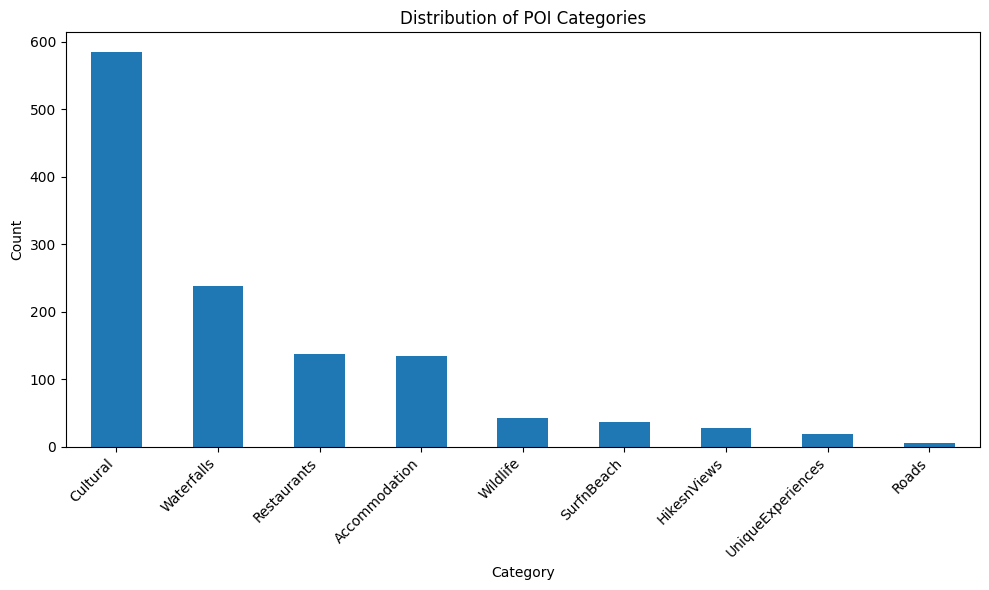

In [5]:
# Explore category distribution
print("Category distribution:")
category_counts = pois['category'].value_counts()
print(category_counts)

# Visualize category distribution
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of POI Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# display First rows of the dataset where the category is 'Road'
print("First 10 rows of the dataset where the category is 'Road':")
pois[pois['category'] == 'Roads'].head(10)

First 10 rows of the dataset where the category is 'Road':


,name,rating,category,latitude,longitude
116,Talangama Lake and Wetlands,3.0,Roads,6.886890,79.946308
187,Baker's Bend,5.0,Roads,6.760896,80.783573
221,Manampitiya Road-Rail Bridge,4.0,Roads,7.913583,81.089432
892,James Taylor's Seat,5.0,Roads,7.146704,80.704529
1113,Lipton's Seat,5.0,Roads,6.780831,81.015505



Rating statistics:
count    1221.000000
mean        3.520885
std         0.946398
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64


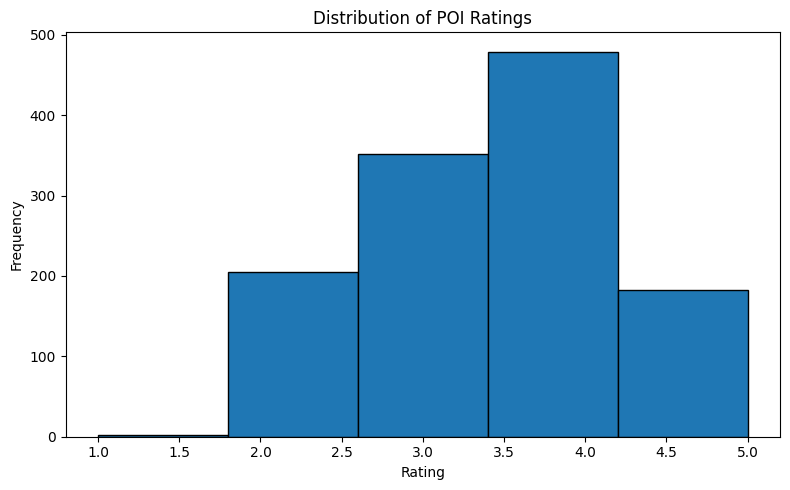

In [8]:
# Check rating distribution
print("\nRating statistics:")
print(pois['rating'].describe())

plt.figure(figsize=(8, 5))
plt.hist(pois['rating'], bins=5, edgecolor='black')
plt.title('Distribution of POI Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Step 3: Data Cleaning

Handle missing values and ensure data quality.

In [9]:
# Remove rows with missing critical data
print(f"Original dataset size: {len(pois)}")

# Drop rows with missing latitude or longitude
pois_clean = pois.dropna(subset=['latitude', 'longitude']).copy()
print(f"After removing missing coordinates: {len(pois_clean)}")

# Fill missing ratings with median rating
median_rating = pois_clean['rating'].median()
pois_clean['rating'].fillna(median_rating, inplace=True)

# Reset index
pois_clean.reset_index(drop=True, inplace=True)

print(f"\nFinal clean dataset size: {len(pois_clean)}")

Original dataset size: 1224
After removing missing coordinates: 1224

Final clean dataset size: 1224


/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_60846/1031124435.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pois_clean['rating'].fillna(median_rating, inplace=True)


### Step 4: Feature Engineering - Interest Score

**Goal:** Assign an interest score (p_i) to each POI based on its category and rating.

**Method:** 
- High-priority categories (Cultural, Wildlife, HikesnViews): 70-100
- Medium-priority (UniqueExperiences, Beaches, Waterfalls): 40-80
- Low-priority (Accommodation, etc.): 10-40
- Score is scaled within range based on rating (1-5)

In [10]:
# Assign interest scores
pois_clean['interest_score'] = pois_clean.apply(
    lambda row: assign_interest_score(row['category'], row['rating']), 
    axis=1
)

print("Interest score statistics:")
print(pois_clean['interest_score'].describe())

# Show sample with scores
print("\nSample POIs with interest scores:")
print(pois_clean[['name', 'category', 'rating', 'interest_score']].head(10))

Interest score statistics:
count    1224.000000
mean       68.212418
std        24.800311
min        17.000000
25%        40.000000
50%        77.000000
75%        85.000000
max       100.000000
Name: interest_score, dtype: float64

Sample POIs with interest scores:
                                  name           category  rating  \
0          Gomarankadawala Hot Springs  UniqueExperiences     3.0   
1               Kirigalpottha Mountain        HikesnViews     5.0   
2                      The Place-Galle      Accommodation     4.0   
3                        Gal Ekka Ella         Waterfalls     2.0   
4   Backpack Beach Hostel & Reggae Bar      Accommodation     4.0   
5                          Balana Fort           Cultural     2.0   
6         Dambegoda Bodhisattva statue           Cultural     3.0   
7  Maligatenne ( Nuwaragalkande) Ruins           Cultural     4.0   
8     Vessagiriya Ruins - Anuradhapura           Cultural     4.0   
9             Welgam Rajamaha Viharaya     

<Figure size 1200x600 with 0 Axes>

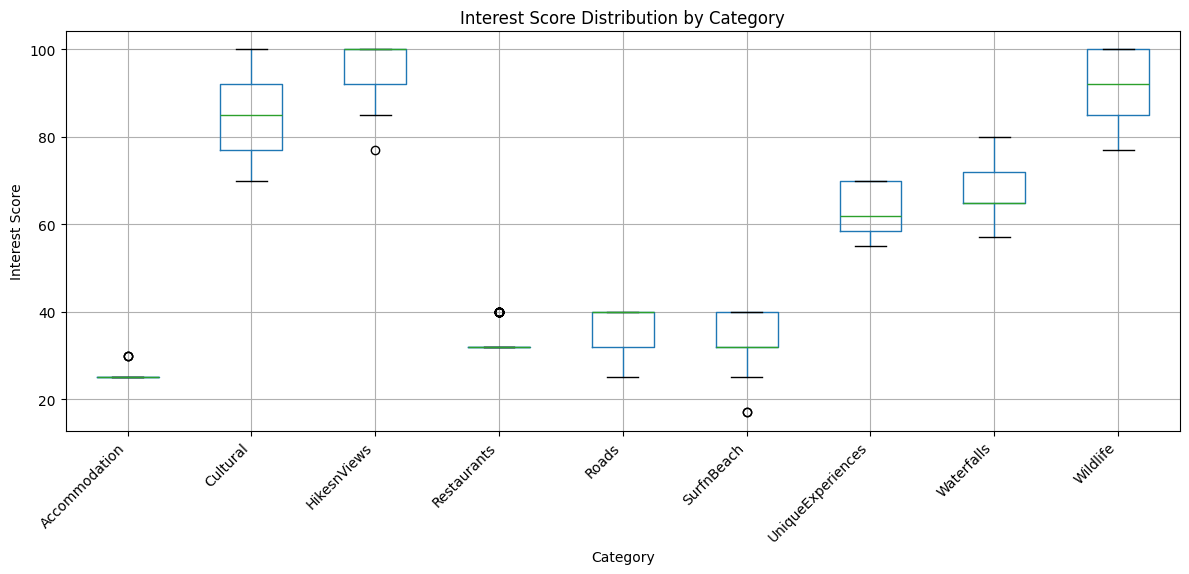

In [11]:
# Visualize interest score distribution by category
plt.figure(figsize=(12, 6))
pois_clean.boxplot(column='interest_score', by='category', figsize=(12, 6))
plt.title('Interest Score Distribution by Category')
plt.suptitle('')  # Remove default title
plt.xlabel('Category')
plt.ylabel('Interest Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 5: Feature Engineering - Visit Duration

**Goal:** Assign visit duration (v_i) in hours to each POI.

**Method:**
- Major sites (high-rated Cultural, Wildlife, etc.): 3 hours
- Standard attractions: 1.5 hours
- Minor viewpoints: 0.5 hours

In [12]:
# Assign visit durations
pois_clean['visit_duration'] = pois_clean.apply(
    lambda row: assign_visit_duration(row['category'], row['rating']),
    axis=1
)

print("Visit duration statistics (hours):")
print(pois_clean['visit_duration'].describe())

print("\nVisit duration distribution:")
print(pois_clean['visit_duration'].value_counts().sort_index())

# Show sample
print("\nSample POIs with visit durations:")
print(pois_clean[['name', 'category', 'rating', 'visit_duration']].head(10))

Visit duration statistics (hours):
count    1224.000000
mean        1.582108
std         0.868499
min         0.500000
25%         0.500000
50%         1.500000
75%         1.500000
max         3.000000
Name: visit_duration, dtype: float64

Visit duration distribution:
visit_duration
0.5    312
1.5    637
3.0    275
Name: count, dtype: int64

Sample POIs with visit durations:
                                  name           category  rating  \
0          Gomarankadawala Hot Springs  UniqueExperiences     3.0   
1               Kirigalpottha Mountain        HikesnViews     5.0   
2                      The Place-Galle      Accommodation     4.0   
3                        Gal Ekka Ella         Waterfalls     2.0   
4   Backpack Beach Hostel & Reggae Bar      Accommodation     4.0   
5                          Balana Fort           Cultural     2.0   
6         Dambegoda Bodhisattva statue           Cultural     3.0   
7  Maligatenne ( Nuwaragalkande) Ruins           Cultural     4.0   


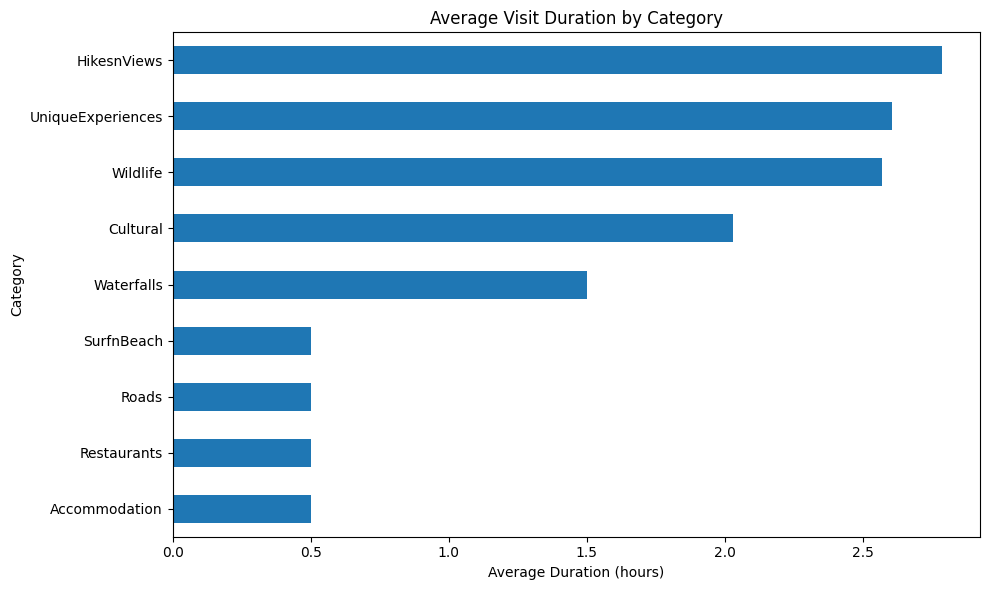

In [13]:
# Visualize visit duration by category
plt.figure(figsize=(10, 6))
duration_by_cat = pois_clean.groupby('category')['visit_duration'].mean().sort_values()
duration_by_cat.plot(kind='barh')
plt.title('Average Visit Duration by Category')
plt.xlabel('Average Duration (hours)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

### Step 6: Travel Time Matrix Calculation

**Goal:** Compute a complete N×N matrix of travel times between all POIs.

**Method:**
1. Use Haversine formula to calculate great-circle distance between coordinates
2. Convert distance to travel time assuming 40 km/h average speed

**Note:** This is computationally intensive for large datasets. For demonstration, we'll compute it for all POIs.

In [14]:
# Calculate travel time matrix
print("Calculating travel time matrix...")
print(f"Matrix size will be {len(pois_clean)} × {len(pois_clean)}")

n = len(pois_clean)
travel_time_matrix = np.zeros((n, n))

# Calculate distances and convert to travel times
for i in range(n):
    if i % 100 == 0:
        print(f"Progress: {i}/{n}")
    for j in range(n):
        if i != j:
            distance = calculate_distance(
                pois_clean.iloc[i]['latitude'],
                pois_clean.iloc[i]['longitude'],
                pois_clean.iloc[j]['latitude'],
                pois_clean.iloc[j]['longitude']
            )
            travel_time_matrix[i, j] = calculate_travel_time(distance)

print("Travel time matrix calculation complete!")
print(f"\nMatrix shape: {travel_time_matrix.shape}")
print(f"Average travel time: {travel_time_matrix[travel_time_matrix > 0].mean():.2f} hours")
print(f"Max travel time: {travel_time_matrix.max():.2f} hours")

Calculating travel time matrix...
Matrix size will be 1224 × 1224
Progress: 0/1224
Progress: 100/1224
Progress: 200/1224
Progress: 300/1224
Progress: 400/1224
Progress: 500/1224
Progress: 600/1224
Progress: 700/1224
Progress: 800/1224
Progress: 900/1224
Progress: 1000/1224
Progress: 1100/1224
Progress: 1200/1224
Travel time matrix calculation complete!

Matrix shape: (1224, 1224)
Average travel time: 3.75 hours
Max travel time: 226.96 hours


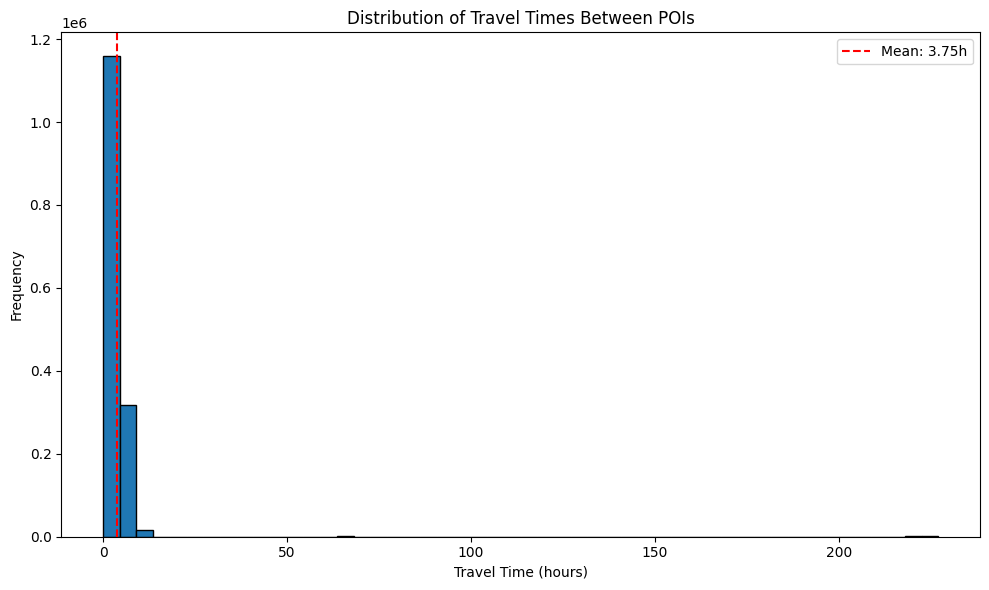

In [15]:
# Visualize travel time distribution
plt.figure(figsize=(10, 6))
travel_times_flat = travel_time_matrix[travel_time_matrix > 0].flatten()
plt.hist(travel_times_flat, bins=50, edgecolor='black')
plt.title('Distribution of Travel Times Between POIs')
plt.xlabel('Travel Time (hours)')
plt.ylabel('Frequency')
plt.axvline(travel_times_flat.mean(), color='red', linestyle='--', label=f'Mean: {travel_times_flat.mean():.2f}h')
plt.legend()
plt.tight_layout()
plt.show()

### Step 7: Create Subset for MIP Solver

The MIP solver cannot handle the full dataset due to computational constraints.
We create a smaller subset of high-quality POIs for MIP optimization.

In [16]:
# Select top 20 POIs based on interest score for MIP solver
top_pois = pois_clean.nlargest(20, 'interest_score').copy()
top_pois.reset_index(drop=True, inplace=True)

print(f"Selected top {len(top_pois)} POIs for MIP solver")
print("\nTop POIs:")
print(top_pois[['name', 'category', 'interest_score', 'visit_duration']])

Selected top 20 POIs for MIP solver

Top POIs:
                                           name     category  interest_score  \
0                        Kirigalpottha Mountain  HikesnViews             100   
1   Temple of the Tooth Relic (Dalada Maligawa)     Cultural             100   
2       Namal Uyana - The Rose Quartz Mountains     Wildlife             100   
3                   Lunugamvehera National Park     Wildlife             100   
4                         Galle Fort (Entrance)     Cultural             100   
5                                Kande Viharaya     Cultural             100   
6                    Hike up Narangala Mountain  HikesnViews             100   
7                               Kabaragala Rock  HikesnViews             100   
8                 Atadage - Polonnaruwa Kingdom     Cultural             100   
9                   Galway's Land National Park     Wildlife             100   
10                Aukana (Awkana) Buddha Statue     Cultural             

In [17]:
# Create travel time matrix for the subset
top_indices = top_pois.index.tolist()
original_indices = pois_clean.nlargest(20, 'interest_score').index.tolist()

n_top = len(top_pois)
travel_time_matrix_subset = np.zeros((n_top, n_top))

for i in range(n_top):
    for j in range(n_top):
        travel_time_matrix_subset[i, j] = travel_time_matrix[original_indices[i], original_indices[j]]

print(f"Subset travel time matrix shape: {travel_time_matrix_subset.shape}")

Subset travel time matrix shape: (20, 20)


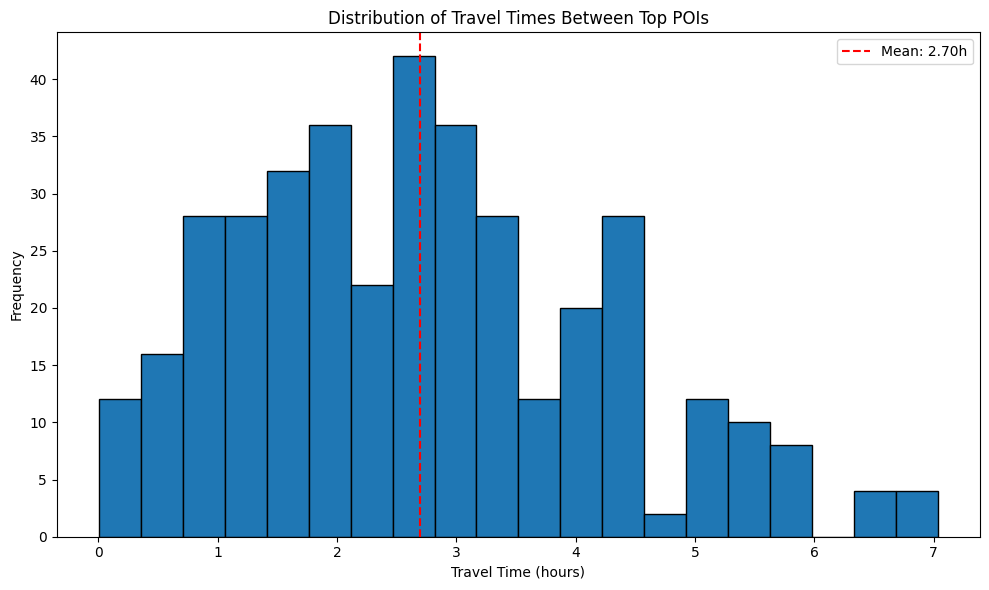

In [18]:
# visualize subset travel time distribution
plt.figure(figsize=(10, 6))
travel_times_subset_flat = travel_time_matrix_subset[travel_time_matrix_subset > 0].flatten()
plt.hist(travel_times_subset_flat, bins=20, edgecolor='black')
plt.title('Distribution of Travel Times Between Top POIs')
plt.xlabel('Travel Time (hours)')
plt.ylabel('Frequency')
plt.axvline(travel_times_subset_flat.mean(), color='red', linestyle='--', label=f'Mean: {travel_times_subset_flat.mean():.2f}h')
plt.legend()
plt.tight_layout()
plt.show()  

### Step 8: Save Processed Data

Save all processed data for use in optimization algorithms.

In [19]:
# Create processed data directory if it doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# Save full dataset
pois_clean.to_csv('../data/processed/pois_processed.csv', index=False)
np.save('../data/processed/travel_time_matrix.npy', travel_time_matrix)

# Save subset for MIP
top_pois.to_csv('../data/processed/pois_subset_mip.csv', index=False)
np.save('../data/processed/travel_time_matrix_subset.npy', travel_time_matrix_subset)

print("Data saved successfully!")
print("\nSaved files:")
print("  - ../data/processed/pois_processed.csv (Full dataset)")
print("  - ../data/processed/travel_time_matrix.npy (Full matrix)")
print("  - ../data/processed/pois_subset_mip.csv (Subset for MIP)")
print("  - ../data/processed/travel_time_matrix_subset.npy (Subset matrix)")

Data saved successfully!

Saved files:
  - ../data/processed/pois_processed.csv (Full dataset)
  - ../data/processed/travel_time_matrix.npy (Full matrix)
  - ../data/processed/pois_subset_mip.csv (Subset for MIP)
  - ../data/processed/travel_time_matrix_subset.npy (Subset matrix)


### Summary

**Completed Steps:**
1. ✓ Loaded and explored POI dataset
2. ✓ Cleaned data and handled missing values
3. ✓ Assigned interest scores based on category and rating
4. ✓ Assigned visit durations based on category
5. ✓ Calculated complete travel time matrix using Haversine formula
6. ✓ Created subset for MIP solver
7. ✓ Saved all processed data

**Key Outputs:**
- Clean dataset with interest scores and visit durations
- Full travel time matrix for all POIs
- Subset of top 20 POIs for MIP optimization

**Next Steps:**
Proceed to notebook 02 for Genetic Algorithm implementation.